Data Analytics using Python :Instagram Reach Analysis

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns  # data visualization
import plotly.express as px # high-level data visualization library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #  text processing
from sklearn.model_selection import train_test_split # model selection
from sklearn.linear_model import PassiveAggressiveRegressor # regression analysis


In [23]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
import wordcloud
print(wordcloud.__version__)

1.9.3


Import dataset

In [4]:
file_path=r"C:\Users\pri13\Downloads\IG Data Analytics\Instagram data.csv"
data= pd.read_csv(file_path, encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

Check dataset for null values

In [5]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Data info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Shape of dataset

In [8]:
data.shape

(119, 13)

In [9]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [10]:
data

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follows  \
0           9       5    162              35        2   
1           7      14    224              48       10   
2          11       1    131              62       12   
3          10       7    213              23        8   
4           5       4    123               8        0   
..        ...     ...    ...             ...      ...   
114         2      38    373              73       80   
115         4       1    148              20       18   
116         0       1     92              34       10   
117         2      75    549             148      214   
118         5      26    443             611      228   

                                               Caption  \
0    Here are some of the most important data visua...   
1    Here are some of the best data science project...   
2    Learn how to train a machine learning model an...   
3    Heres how you can write a Python program to d...   
4    Plotting annotations while visualizing your da...   
..                                                 ...   
114  Here are some of the best data science certifi...   
115  Clustering is a machine learning technique use...   
116  Clustering music genres is a task of grouping ...   
117  Here are some of the best data science certifi...   
118  175 Python Projects with Source Code solved an...   

                                              Hashtags  
0    #finance #money #business #investing #investme...  
1    #healthcare #health #covid #data #datascience ...  
2    #data #datascience #dataanalysis #dataanalytic...  
3    #python #pythonprogramming #pythonprojects #py...  
4    #datavisualization #datascience #data #dataana...  
..                                                 ...  
114  #datascience #datasciencejobs #datasciencetrai...  
115  #machinelearning #machinelearningalgorithms #d...  
116  #machinelearning #machinelearningalgorithms #d...  
117  #datascience #datasciencejobs #datasciencetrai...  
118  #python #pythonprogramming #pythonprojects #py...  

[119 rows x 13 columns]

Analyzing Instagram Reach:
Distribution of impressions

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


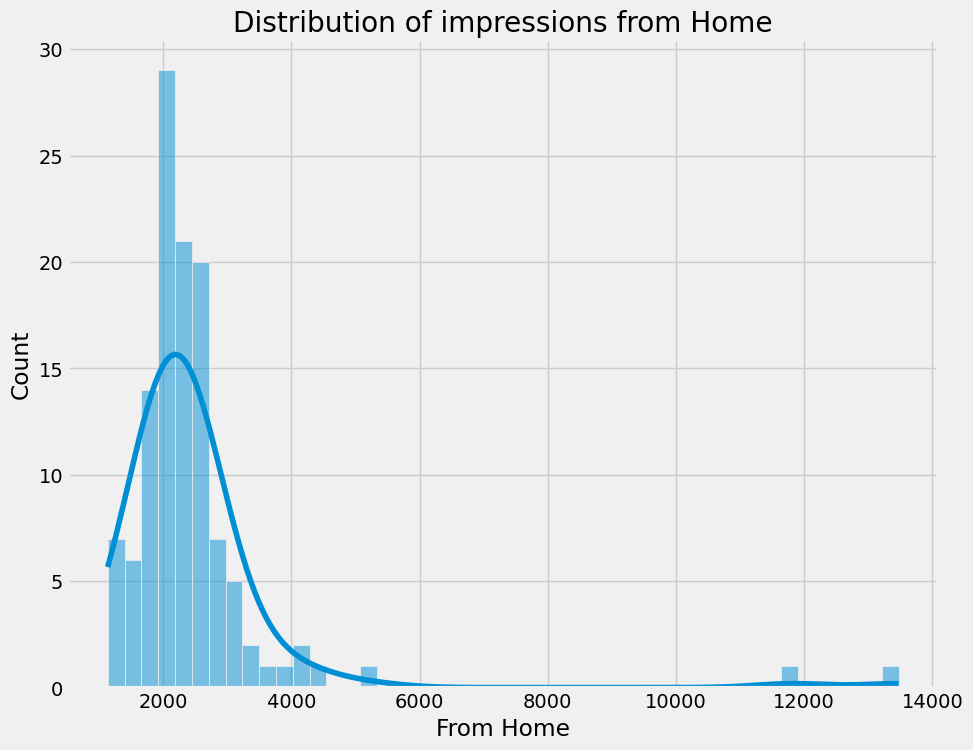

In [12]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of impressions from Home")  # Corrected to plt.title()
sns.histplot(data['From Home'], kde=True)
plt.show()

Distribution of Impressions From Hashtags

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


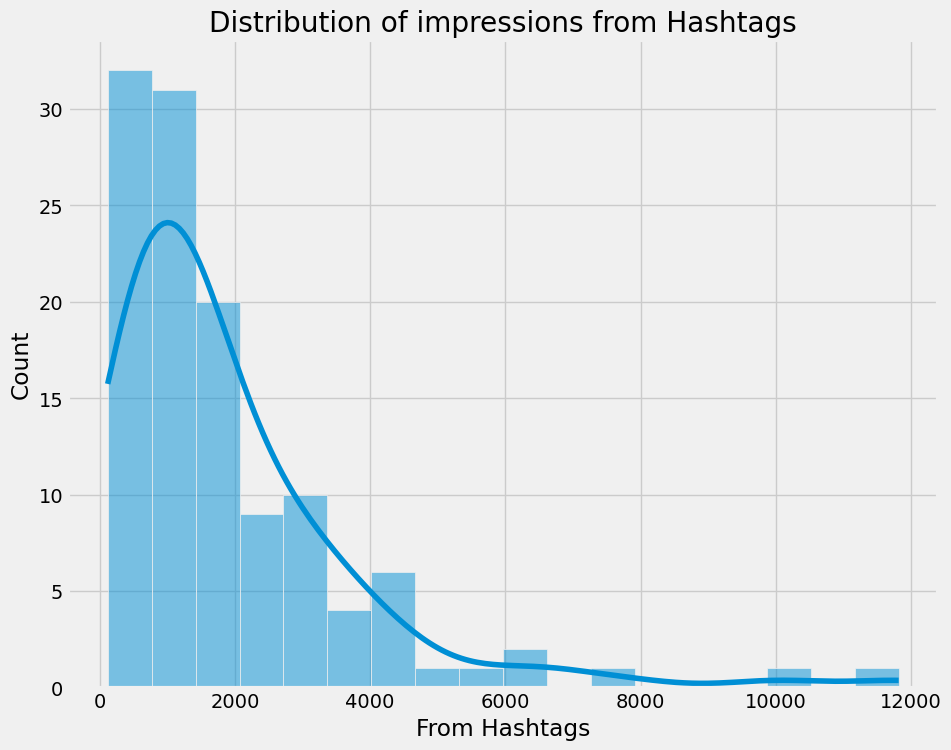

In [13]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of impressions from Hashtags")  # Corrected to plt.title()
sns.histplot(data['From Hashtags'], kde=True)
plt.show()

Distribution of Impressions From Explore

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


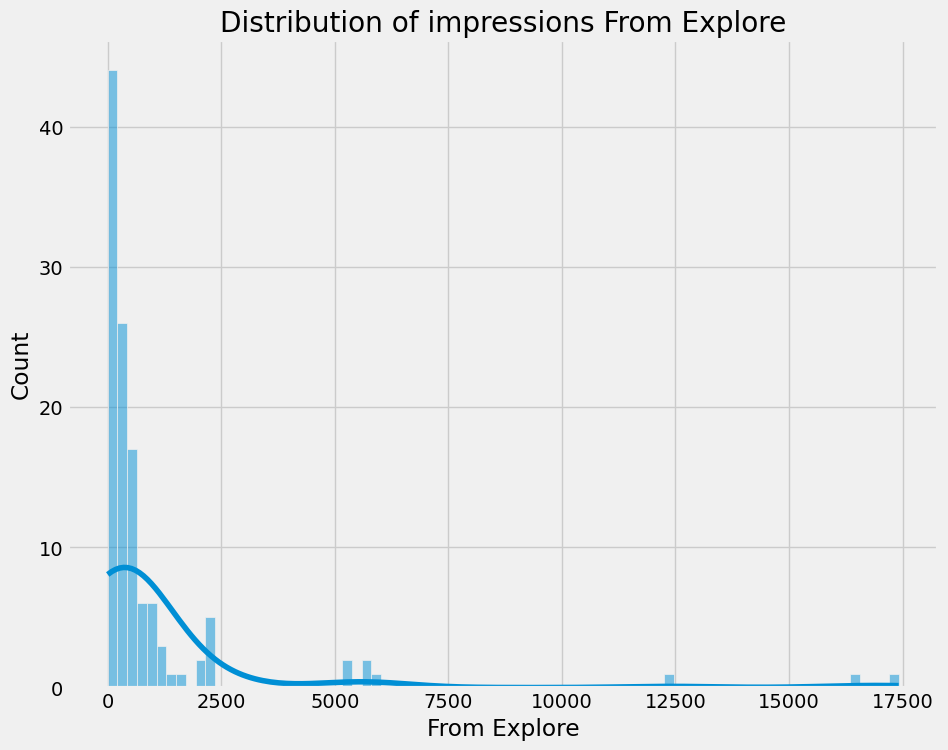

In [14]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of impressions From Explore")  # Corrected to plt.title()
sns.histplot(data['From Explore'], kde=True)
plt.show()

Percentage of impressions

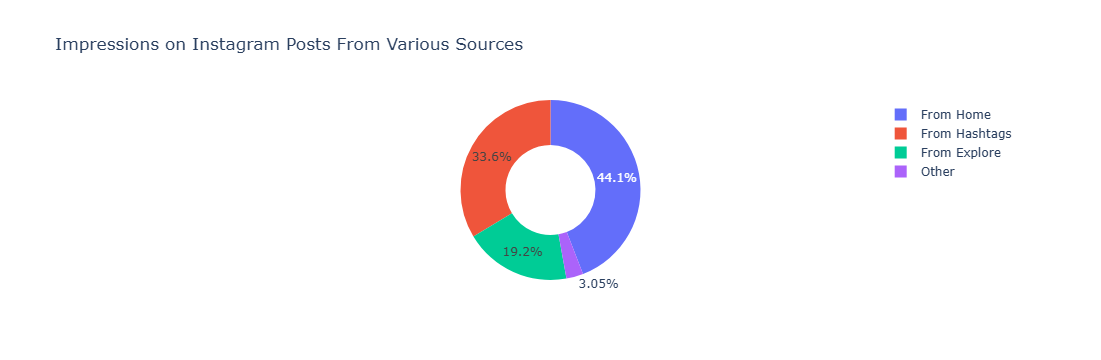

In [18]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels= ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

The above donut plot shows that almost 50 per cent of the reach is from my followers, 
38.1 per cent is from hashtags, 
9.14 per cent is from the explore section, and 
3.01 per cent is from other sources.

Analysing Content
Here. the dataset has two columns, namely caption and hashtags, which will help to understand the kind of content posted on Instagram.Createte a wordcloud of the caption column to look at the most used words in the caption oy Instagram poss:

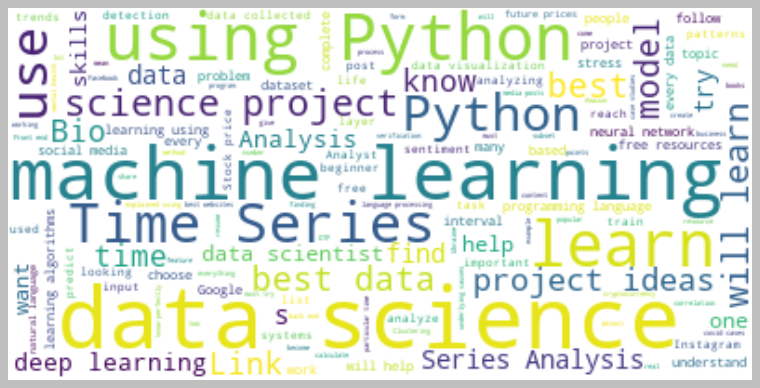

In [28]:
text= " ".join(i for i in data.Caption)
stopwords= set(STOPWORDS) #filter out common words
wordcloud= WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Get the image data as a NumPy array
image_array = wordcloud.to_array() 
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Analysing Content: Hasthatgs

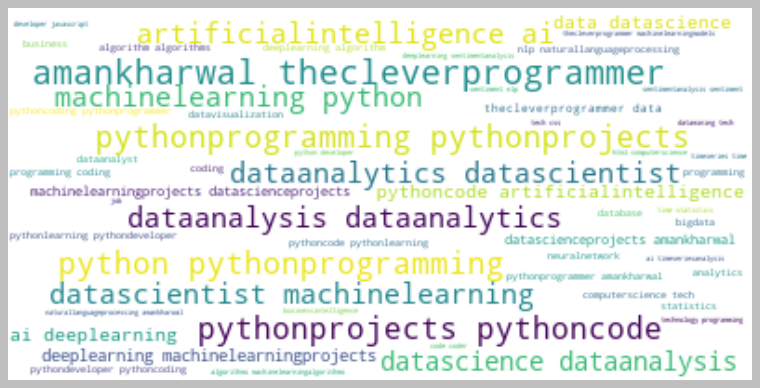

In [29]:
text=" ".join(i for i in data.Hashtags)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
image_array= wordcloud.to_array()
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Analysing Relationships.
Understanding how the Instagram algorithm works.
Relationship between the number of likes and the number of impressions on my Instagram posts.

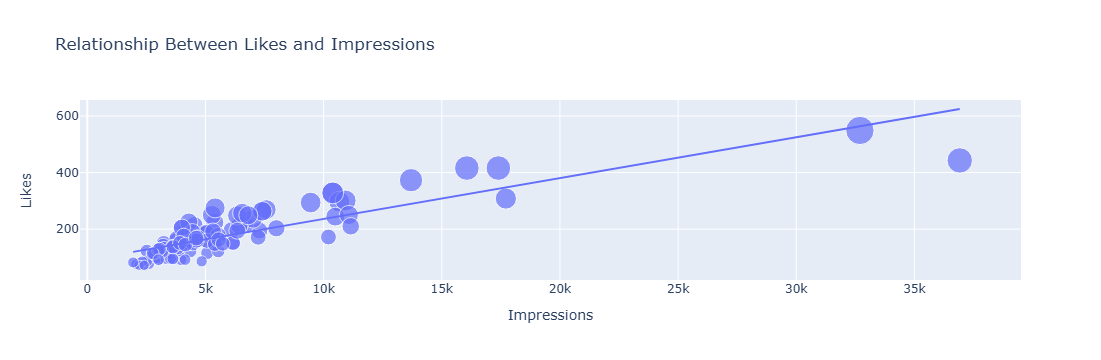

In [30]:
figure=px.scatter(data_frame=data, x="Impressions",y="Likes",size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

here, there is a linear relationship between the number of likes and the reach on Instagram. 

Now let’s see the relationship between the number of comments and the number of impressions on Instagram posts:

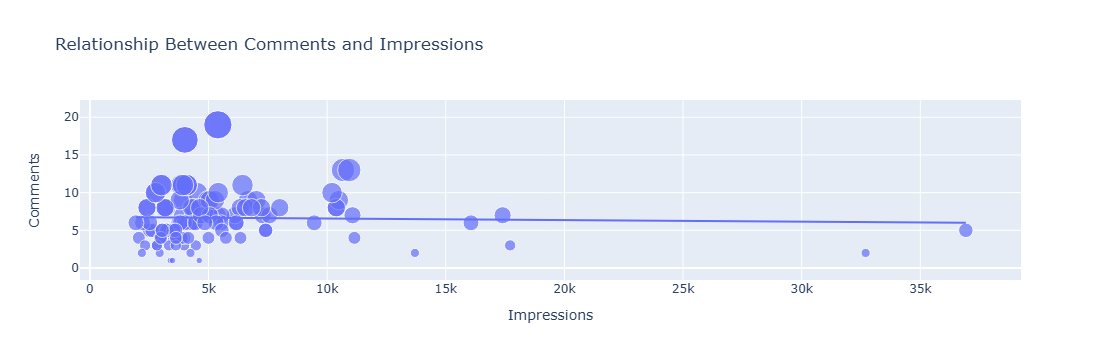

In [32]:
figure=px.scatter(data_frame=data, x="Impressions",y="Comments",size="Comments",trendline="ols",
                  title= "Relationship Between Comments and Impressions")
figure.show()

In [ ]:
Relationship Between Shares and Total Impressions

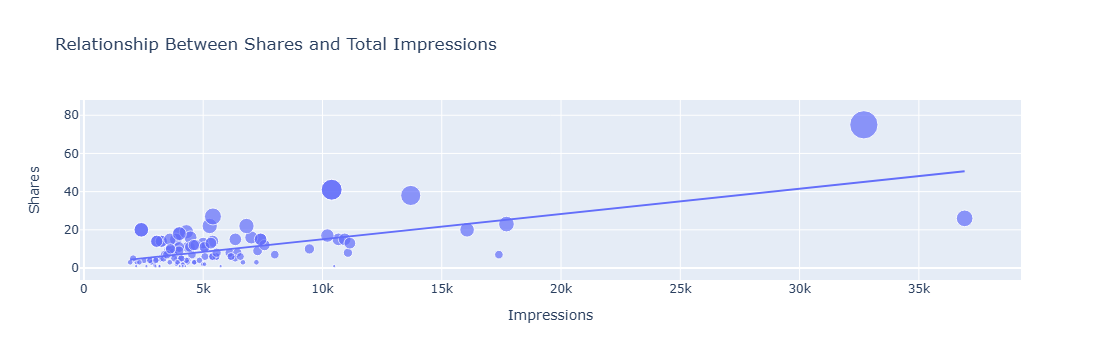

In [33]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do. 

Now let’s have a look at the relationship between the number of saves and the number of impressions

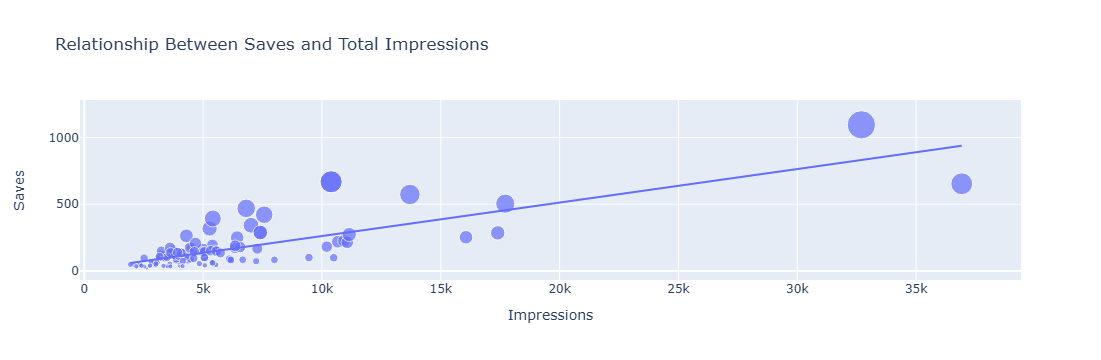

In [34]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Saves and Total Impressions")
figure.show()

There is a linear relationship between the number of times my post is saved and the reach of Instagram post.

Correlation of all the columns with the Impressions column

In [41]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation = numeric_data.corr()

# Display correlation with the 'Impressions' column
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

Analyzing Conversion Rate
In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. 

Conversion rate = (Follows/Profile Visits) * 100

In [42]:
conversion_rate=(data["Follows"].sum()/data["Profile Visits"].sum()) *100
print(conversion_rate)

41.00265604249668


Conversation rate of Instagram account is 41% which sounds like a very good conversation rate. 

Relationship between the total profile visits and the number of followers gained from all profile visits:

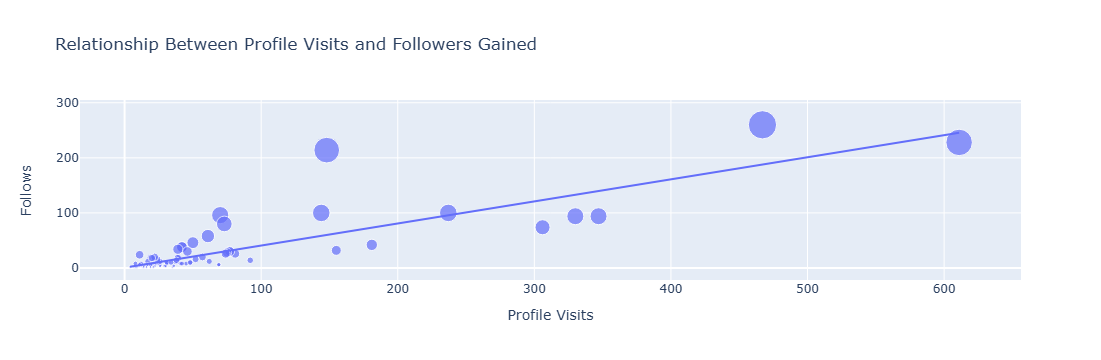

In [43]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

The relationship between profile visits and followers gained is also linear.

Instagram Reach Prediction Model

Training a machine learning model to predict the reach of an Instagram post. Split the data into training and test data sets 

In [44]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [45]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8227437065296919

In [ ]:
Prediction by giving inputs

In [46]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11907.32299294])

So this is how you can analyze and predict the reach of Instagram posts with machine learning using Python.

 If a content creator wants to do well on Instagram in a long run, they have to look at the data of their Instagram reach. 